# ICS - Travaux Pratiques 3

12.03.25


<font color=grey>_Ce troisième TP reprend certains des exercices vu la semaine passée, mais cette fois en utilisant des fonctions. Il vous permettra donc également d'entraîner votre maîtrise des structures de contrôle `if`, `for` et `while` tout en vous familiarisant avec l'écriture de fonctions, la gestion des valeurs retournées et des variables locales et globales. Finalement, il présente une première notion de modularité, que nous utiliserons par la suite. Nous vous encourageons à vous renseigner sur les différentes fonctions accessibles dans les modules vus en cours._




_Note : ne vous sentez pas obligé.e.s de finir la série pendant la séance! Celle-ci est conçue de manière à ce que vous gardiez certains exercices pour vos révisions._ </font>

***
***

## Exercice 1 : qu'affichent les programmes suivants


Essayez de prédire la sortie de programmes ci-dessous. N'hésitez pas à changer les valeurs et tester différents paramètres ! 

In [1]:
print(print("hello"))

hello
None


In [2]:
def f():
    x = 5
    print(f"je suis dans f, {x = }")

x = 2
print(f"je suis dehors, {x = }")
f()
print(f"je suis dehors, {x = }")

je suis dehors, x = 2
je suis dans f, x = 5
je suis dehors, x = 2


<font color=pink>**Pour aller plus loin...** : On peut définir une variable comme `global` dans le corps d'une fonction. Dans ce cas, cette variable devient **globale**, c'est-à-dire qu'elle devient accessible en dehors du corps de la fonction du moment que cette dernière a été exécutée au moins une fois.

Cette pratique n'est pas recommandée car en définissant une variable globale dans une fonction, on risque d'effacer une variable du même nom qui est définir dans le code principal. </font>

In [3]:
x1 = 1
y1 = 1
def f():
    global x1
    x1 = 3
    y1 = 3
print(x1)
print(y1)
f()
print(x1)
print(y1)

1
1
3
1


In [11]:
def f():
    global xx
    xx = 3

print(xx)
f()

NameError: name 'xx' is not defined

In [12]:
def f():
    global x
    x = 5
    print(f"je suis dans f, {x = }")

x = 2
print(f"je suis dehors, {x = }")
f()
print(f"je suis dehors, {x = }")

je suis dehors, x = 2
je suis dans f, x = 5
je suis dehors, x = 5


In [13]:
def salut(nom, prenom, reverse = False):
    if reverse:
        print(f"salut {nom} {prenom}!")
    else:
        print(f"salut {prenom} {nom}!")
        
salut("Lapin", "Jojo")

salut Jojo Lapin!


In [14]:
salut("Lapin", "Jojo", True)

salut Lapin Jojo!


In [15]:
salut("Lapin", "Jojo", False)

salut Jojo Lapin!


In [16]:
salut(Lapin, Jojo)

NameError: name 'Lapin' is not defined

In [17]:
def f(x, y = 1, z = "blah"):
    print(x, y, z)
    
f(1, 2)

1 2 blah


In [18]:
f(1, "blih")

1 blih blah


In [19]:
def vol_cube(x1, x2, x3 = 1):
    return x1 * x2 * x3

print(vol_cube(2, 3, 4))

24


In [20]:
print(vol_cube(2, 3))

6


In [21]:
print(vol_cube(2))

TypeError: vol_cube() missing 1 required positional argument: 'x2'

In [22]:
print(vol_cube(x2 = 3, x1 = 2))

6


In [23]:
print(vol_cube(x3 = 4, x2 = 3, x1 = 2))

24


In [24]:
print(vol_cube(x3 = 4, x2 = 3))

TypeError: vol_cube() missing 1 required positional argument: 'x1'

In [25]:
print(vol_cube(x1 = 2, 3, 4))

SyntaxError: positional argument follows keyword argument (2312775205.py, line 1)

***

## Exercice 2 : classification de notes

Alice cherche à classifier les résultats de ses examens afin de mieux organiser son futur travail. Elle aimerait les décomposer en trois groupes:
- Si elle a eu moins de 3.5 à cet examen, alors la matière appartient au groupe 1
- Si elle a eu entre 3.5 (compris) et 4 (compris), alors celle-ci appartient au groupe 2
- Si elle a eu plus de 4, celle-ci appartient au groupe 3.
- Si la note n'est pas comprise entre 1 et 6, alors elle ne fait partie d'aucun groupe.

Ecrivez une fonction qui prend comme argument la note obtenue, et retourne un entier représentant le groupe dans lequel il faut placer cette matière. 

<font color=grey>Note : nous verrons comment gérer le dernier cas dans quelques semaines avec la syntaxe `try... except`. Pour l'instant, vous pouvez retourner 0 si la note donnée en entrée n'appartient pas aux groupe 1, 2, ou 3.</font>

In [28]:
# Votre réponse ici
def assign_group(note):
    if note < 1:
        return 0
    if note < 3.5:
        return 1
    if note <= 4:
        return 2
    if note <= 6:
        return 3
    return 0

print(assign_group(float(input("note: "))))


note:  3


1


***

# Exercice 3 : docstring


Ecrire une docstring appropriée et détaillée à la fonction ci-dessous.

In [29]:
def convert_temp(t, unit):
    '''
    Convert a temperature between Celsius, Fahrenheit, and Kelvin.

    Args:
        t (float): The temperature value to convert.
        unit (str): The current unit of temperature; must be one of "celsius", 
                    "fahrenheit", or "kelvin".

    Returns:
        tuple: Contains converted temperatures as (int). The specific format depends on the input unit:
            - If input is celsius, returns: (kelvins, fahrenheit).
            - If input is fahrenheit, returns: (celsius, kelvin).
            - If input is kelvin, returns: (celsius, fahrenheit).

    Raises:
        "c'est quoi cette unité??": If the provided unit is not recognized.
        "error": If the temperature value is too low to be physically possible.
    '''
    
    if unit == "celsius":
        if t < -273:
            print("error")
            return
        return t + 273, t * 9/5 + 32
    elif unit == "fahrenheit":
        if t < -459:
            print("error")
            return
        return (t-32)* 5/9, (t-32)* 5/9 + 273
    elif unit == "kelvin":
        if t < 0:
            print("error")
            return
        return t - 273, (t - 273)* 9/5 + 32
    else :
        print("c'est quoi cette unité??")    
    
print(convert_temp.__doc__)


Convert a temperature between Celsius, Fahrenheit, and Kelvin.

Args:
    t (float): The temperature value to convert.
    unit (str): The current unit of temperature; must be one of "celsius", 
                "fahrenheit", or "kelvin".

Returns:
    tuple: Contains converted temperatures as (int). The specific format depends on the input unit:
        - If input is celsius, returns: (kelvins, fahrenheit).
        - If input is fahrenheit, returns: (celsius, kelvin).
        - If input is kelvin, returns: (celsius, fahrenheit).

Raises:
    "c'est quoi cette unité??": If the provided unit is not recognized.
    "error": If the temperature value is too low to be physically possible.



***

## Exercice 4 : Recherche d'un nombre premier

Un nombre entier positif est dit **premier** s'il n'est divisible que par $1$ et par lui-même. Par définition, $1$ n'est pas un nombre premier, le plus petit nombre premier est donc $2$.

**a)** Ecrire une fonction `divise` qui prend comme paramètre deux entiers strictement positifs $d$ et $N$, et retourne `True` si $d$ divise $N$, et `False` sinon.

In [30]:
import pytest

In [31]:
def divise(divided, divisor):
    '''
    Determines if an integer is dividable by another

    Args:
        divided (int): integer that will be divided
        divisor (int): integer that will divide "divided"

    Returns:
        True: if "divisor" divides "divided"
        False: otherwhise
    '''
    if divided % divisor == 0:
        return True
    else:
        return False

def divise_test():
    '''
    Unit test for divise()
    '''
    assert divise(3, 3)
    assert not divise(3, 2)
    assert divise(10, 5)
    assert not divise(16, 9)

divise_test()


**b)** Ecrire une fonction `premier` qui prend comme paramètre un entier strictement positif $N$ et retourne `True` s'il est premier, et `False` s'il ne l'est pas. Cette fonction peut faire appel à la fonction `divise` définie dans le point (a).

In [32]:
def premier(integer):
    '''
    Tests if a given integer is a prime number

    Args:
        integer (int): integer to test

    Returns:
        True: if integer is a prime number
        False: if not
    '''
    if integer == 1:
        return False

    root = int(integer ** 0.5) + 1 # returns one over the floor of the root of integer
    for i in range(2, root + 1):
        if divise(integer, i) and i != integer:
            return False

    return True

def premier_test():
    '''
    Unit test for premier()
    '''
    assert premier(2)
    assert premier(3)
    assert premier(7)
    assert not premier(82)
    assert premier(13)

premier_test()

**c)** Quel est le $7^{\rm e}$ nombre premier?

In [33]:
prime_count = 0
i = 1
while prime_count < 100:
    i += 1
    if premier(i):
        prime_count += 1

print(i)
    

541



<font color=grey>Note : cet algorithme de résolution n'est pas optimal en terme de consommation de ressources. Il fonctionne bien pour des petits N, mais son exécution prend beaucoup de temps pour des grands nombres.</gray>

***

## Exercice 5: affichage d'étoiles


Dans l'exercice 2 de la série 2, vous avez produit, à l'aide de deux boucles `for` imbriquées, en n'imprimant qu'un seul caractère `*` à la fois et sans utiliser les opérateurs de concaténation de strings, chacun des affichages suivants:

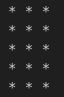
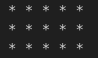
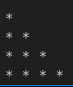


**a)** On aimerait maintenant généraliser les deux premiers affichages en définissant une fonction `rectangle`. Celle-ci doit prendre deux paramètres `m` et `n` en entrée et afficher un rectangle d'étoiles de `m` lignes et `n` colonnes (et ne rien retourner). Si `m` n'est pas précisé, le rectangle doit posséder 1 ligne, comme au point (a) de la série de la semaine passée.


In [34]:
def print_rectangle(n, m=1):
    '''
    Prints out a pattern of m lines and n columns of "*"

    Args:
        n (int): Amount of printed "*" per line.
        m (int, optional): Amount of lines printed. Defaults to 1.

    Returns:
        None
    '''
    for i in range(m):
        for j in range(n):
            print("* ", end="")
        print()

print_rectangle(3, 4)

* * * 
* * * 
* * * 
* * * 



**b)** De même, définissez une fonction `triangle`. Celle-ci doit prendre un paramètre `m` en entrée et afficher un triangle isocèle avec `m` étoiles par côté. Par exemple, le triangle de la donnée ci-dessous est produit par l'appel `triangle(4)`.


In [35]:
def print_triangle(m):
    '''
    Prints out a triangular pattern of m by m sides with "*"

    Args:
        m (int): Triangle's sides length

    Returns:
        None
    '''
    for i in range(m + 1):
        for j in range(i):
            print("* ", end="")
        print()

print_triangle(3)


* 
* * 
* * * 



**c)** On aimerait maintenant définir une fonction qui puisse afficher soit un triangle, soit un rectangle selon ce que désire l'utilisateur. Ecrivez une fonction `polygone` qui prend en entrée trois paramètres `poly`, `m`, et `n`, et 
- si `poly` a la valeur 'R', affiche un rectangle de `m` lignes et `n` colonnes (3 colonnes si `n` n'est pas précisé)
- si `poly` a la valeur 'T', affiche un triangle isocèle de `m` lignes et colonnes
- si `poly` a toute autre valeur, affiche un message d'erreur.


In [36]:
def polygone(m, poly, n=3):
    '''
    Prints either a rectangle or a triangle with "*"

    Args:
        m (int): Height of the pattern.
        poly (str): Type of pattern. Must be one of "T" (triangular pttern) or "R" (rectangular pattern).
        n (int, optional): Width of the pattern. Defaults to 3.

    Returns:
        none
    '''
    if poly == "T":
        print_triangle(m)
    elif poly =="R":
        print_rectangle(n, m)
    else:
        print("Unknown shape")

polygone(3, "R", 5)
    

* * * * * 
* * * * * 
* * * * * 


***

## Exercice 6 : Différence entre le maximum et minimum de trois nombres


Reprenons l'exercice 4 b) de la série 2. Construisez une fonction qui retourne le maximum et le minimum entre trois nombres, puis calculez leur différence. Vous ne pouvez pas utiliser les fonctions natives `min()` et `max()`.

***

## Exercice 7: Résoudre une équation du 2e degré


<font color = grey> Préambule : Pour résoudre une **équation quadratique** $ax^2 + bx + c = 0$, où $a \neq 0$, $b$ et $c$ sont des coefficients réels, on commence par calculer son **discriminant** $\Delta = b^2 - 4 ac$. L'ensemble de solutions de l'équation dépendra du signe de $\Delta = b^2 - 4 ac$ :

- Si $\Delta > 0$, l'équation admet deux solutions distinctes réelles $x_1 = \frac{-b + \sqrt{\Delta}}{2a}$ et $x_2 = \frac{-b - \sqrt{\Delta}}{2a}$
- Si $\Delta = 0$, l'équation admet une solution réelle double $x_0 = \frac{-b + \sqrt{\Delta}}{2a} = \frac{-b - \sqrt{\Delta}}{2a} = \frac{-b}{2a}$
- Si $\Delta < 0$, l'équation n'admet aucune solution réelle. </font>

**a)** Ecrivez une fonction `racine_polynome_quadratique` qui
- prend en entrée trois coefficients réels $a$, $b$, $c$
- s'assure que $a \neq 0$ et sinon ne retourne rien
- si l'équation admet deux solutions distinctes, retourne ces deux solutions
- si l'équation admet une solution double, retourne deux fois cette valeur 
- si l'équation n'admet pas de solution réelle, retourne la valeur -1 .

Par exemple, les instructions

$\verb?x, y = racine_polynome_quadratique(2, 3, 1)?$

$\verb?print(x, y)?$

doivent afficher 

$\verb?-0.5 -1.0?$

et les instructions

$\verb?x, y = racine_polynome_quadratique(1, -2, 1)?$

$\verb?print(x, y)?$

doivent afficher

$\verb?1.0 1.0?$


In [39]:
def racine_polynome_quadratique(a, b, c):
    if a == 0:
        return None

    # Calcul du discriminant
    delta = b**2 - 4*a*c

    if delta > 0:
        # Deux solutions distinctes
        x1 = (-b + delta**(0.5)) / (2*a)
        x2 = (-b - delta**(0.5)) / (2*a)
        return x1, x2
    elif delta == 0:
        # Une solution double
        x0 = -b / (2*a)
        return x0, x0
    else:
        # Pas de solutions réelles
        return -1



**b)** Ecrivez une fonction `poly_quadratique_affichage` qui
- prend en entrée trois coefficients réels $a$, $b$, $c$
- appelle la fonction `racine_polynome_quadratique` avec ces trois valeurs
- distingue par un affichage approprié les quatre cas de figure (deux racines, une racine, pas de racines, et l'équation n'est pas quadratique).

Donc 
- l'instruction $\verb?poly_quadratique_affichage(2, 3, 1)?$ doit afficher:

$\verb?l'équation 2x^2 + 3x + 1 = 0 admet deux solutions -0.5 et -1.0?$


- l'instruction $\verb?dpoly_quadratique_affichage(1, -2, 1)?$ doit afficher:

$\verb?l'équation 1x^2 + -2x + 1 = 0 admet une solution 1.0?$

- l'instruction $\verb?poly_quadratique_affichage(1, 1, 1)?$ doit afficher:

$\verb?l'équation 1x^2 + 1x + 1 = 0 n'admet pas de solutions réelles?$

- l'instruction $\verb?poly_quadratique_affichage(0, 3, 1)?$ doit afficher:

$\verb?l'équation 3x + 1 = 0 n'est pas quadratique?$.


Remarque:
- La fonction `poly_quadratique_affichage` peut faire autant d'appels à `racine_polynome_quadratique` que vous le désirez
- si vous savez que `racine_polynome_quadratique` retourne deux valeurs, l'instruction $\verb?x, y = racine_polynome_quadratique(a, b, c)?$ affectera ces deux valeurs aux deux variables x et y.

In [ ]:
# Réponse au point b)


---

## Exercice 8 : Aire en plusieurs dimensions

<font color=greblueen> Chaque semaine, je vous propose un exercice sans corrigé détaillé mais en vous indiquant la réponse finale. Ce sera donc à vous de faire l'effort de résoudre ce problème à l'aide des ressources à disposition : vos notes de cours, les forums sur internet ou même ChatGPT du moment que vous faites l'effort de comprendre le code que vous fournit ce Chatbot! </font>

Ecrivez une fonction `aire_cercle()` qui permet de calculer l'aire d'un cercle ($A_{c}=\pi r^2$) ou le volume d'une sphère ($V_s = \frac{4}{3}\pi r^3$).

Celle-ci prend comme paramètre obligatoire une longueur `r` et comme paramètre optionnel la dimension `dim`de l'objet.
- Si la valeur de `dim` n'est pas précisée lors de l'appel de la fonction, alors celle-ci doit afficher `Précisez la dimension de l'objet` et ne retourne rien
- Si `dim = 1`, alors la fonction retourne 0
- Si `dim = 2`, alors la fonction retourne l'aire d'un cercle de rayon `r`.
- Si `dim = 3`, alors la fonction retourne le volume d'une sphère de rayon `r`.
- Si `dim` vaut autre chose, la fonction doit afficher `Dimension supérieure à trois ou mal définie` et retourner `None`.

Le nombre $\pi$ est défini en tant que `pi` dans le module `math`de la librairie standard de Python.

Par exemple, l'appel `aire_cercle(3,2)` retournera `28.274`, et `aire_cercle(2,3)` retournera `33.510`.

In [ ]:
# Votre réponse ici